In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel("C:\\Users\\user\\Desktop\\machine\\data_1017.xlsx",sheet_name="Sheet1")

In [2]:
# def split_omr_data(df):
#     # 'ht_omr_data' 열의 값을 리스트로 변환 (한 글자씩)
#     omr_responses = df['ht_omr_data'].apply(lambda x: list(x[:375]))  # 375개의 문항까지만 자름
#     # 리스트를 각각의 문항으로 나누어 새로운 컬럼으로 변환
#     omr_df = pd.DataFrame(omr_responses.tolist(), columns=[f'Q{i+1}' for i in range(375)])
#     # 원래 df와 결합
#     df = pd.concat([df, omr_df], axis=1)
#     return df

# # 데이터 분리 실행
# df_split = split_omr_data(df)

# # 결과 확인
# print(df_split.head())
# df = df_split

   sex  sc_code  age                                        ht_omr_data  \
0    1        3   32  9011110110000010001001001000101010001001101010...   
1    1        1   39  1100010110000000001001101099100111011001101010...   
2    1        4   39  9110000110100000000001111000101010000000101110...   
3    2        3   34  0000010110000000001000000000101010001000000010...   
4    1        2   34  0000100111010000011000101000101010000001000100...   

  fixed_type  FG Q1 Q2 Q3 Q4  ... Q366 Q367 Q368 Q369 Q370 Q371 Q372 Q373  \
0          A   0  9  0  1  1  ...    0    0    0    0    0    1    0    0   
1          C   0  1  1  0  0  ...    0    0    1    0    0    1    0    0   
2          M   0  9  1  1  0  ...    0    0    1    0    0    1    0    0   
3          M   0  0  0  0  0  ...    0    1    1    0    0    1    0    1   
4          B   0  0  0  0  0  ...    1    0    1    0    0    1    0    0   

  Q374 Q375  
0    0    1  
1    1    1  
2    0    1  
3    0    1  
4    1    1  

[

In [2]:
label_encoder = LabelEncoder()

# 'fixed_type'을 숫자형으로 변환
df['fixed_type_encoded'] = label_encoder.fit_transform(df['fixed_type'])

print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'D1': 4, 'D2': 5, 'E': 6, 'M': 7, 'M1': 8, 'M2': 9, 'Ma': 10, 'Mb': 11, 'Mc': 12, 'R': 13, 'X': 14}


In [3]:
df = df.drop(['fixed_type','ht_omr_data','FG'], axis=1)

In [4]:
df

,sex,sc_code,age,t1,t2,t3,t4,t5,t6,t7,...,t19,t20,t21,t22,t23,t24,t25,t26,t27,fixed_type_encoded
0,1,3,32,48,55,57,54,46,59,60,...,44,62,37,49,53,51,46,39,61,0
1,1,1,39,61,56,61,60,50,57,55,...,42,41,30,39,43,54,44,57,41,2
2,1,4,39,46,36,51,52,46,52,49,...,43,55,47,44,44,48,45,43,65,7
3,2,3,34,46,54,46,61,48,59,52,...,44,41,36,46,44,40,46,41,57,7
4,1,2,34,37,39,46,50,44,57,64,...,42,45,46,42,43,42,44,41,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,1,3,39,44,51,51,56,58,57,49,...,43,41,41,44,51,53,45,58,53,0
30867,1,1,29,43,53,43,49,43,46,45,...,52,80,60,55,60,45,57,47,38,7
30868,2,1,38,45,35,53,42,44,45,54,...,51,47,64,52,43,41,43,40,39,0
30869,2,1,18,43,51,50,44,51,52,49,...,45,41,40,50,42,50,46,42,45,0


튜닝 가능한 부분과 설명:
filters=64 및 filters=128 (CNN 레이어):

효과: 필터 수를 늘리면 모델이 더 복잡한 패턴을 학습할 수 있지만, 과적합의 가능성도 높아집니다. 필터 수를 32나 256 등으로 변경하며 성능을 관찰할 수 있습니다.
kernel_size=3 (CNN 레이어):

효과: 커널 크기를 5, 7로 변경해 더 넓은 패턴을 학습할 수 있지만, 크기가 커지면 세부 정보를 잃을 수 있습니다. 작은 커널 크기는 세밀한 정보를 잡아내는 데 유리합니다.
GRU(64) (GRU 레이어):

효과: GRU의 유닛 수를 128, 256으로 늘리거나 줄일 수 있습니다. 유닛 수를 늘리면 모델의 학습 용량이 증가하지만 학습 속도는 느려질 수 있습니다.
l2(0.001) (정규화):

효과: 정규화 강도를 0.0001이나 0.01로 변경하면 가중치에 대한 패널티를 조정하여 과적합을 방지할 수 있습니다. 이 값을 크게 설정하면 모델이 너무 일반화되어 학습이 충분히 이루어지지 않을 수 있습니다.
Dropout(0.3):

효과: Dropout 비율을 0.5로 늘리거나 0.2로 줄일 수 있습니다. 너무 높으면 학습이 불안정해질 수 있고, 너무 낮으면 과적합의 위험이 있습니다.
learning_rate=0.00001 (학습률):

효과: 학습률을 0.0001이나 0.000001로 변경하면 학습 속도가 조정됩니다. 너무 높으면 최적의 가중치를 찾지 못할 수 있고, 너무 낮으면 학습 시간이 길어집니다.
epochs=500:

효과: epochs 수를 조정하여 학습 횟수를 늘리거나 줄일 수 있습니다. 너무 많으면 과적합될 수 있고, 너무 적으면 충분히 학습하지 못할 수 있습니다.
batch_size=16:

효과: 배치 크기를 32나 64로 변경하면 학습 속도에 영향을 줍니다. 작은 배치 크기는 학습이 더 세밀하게 진행되지만 속도가 느려지고, 큰 배치 크기는 빠르지만 학습이 덜 세밀할 수 있습니다.

Epoch 1/1500


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


382/386 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3103 - loss: 2.2682
Epoch 1: val_loss improved from inf to 0.96002, saving model to C:/Users/user/Desktop/CNN_DNN.weights.h5
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3121 - loss: 2.2612 - val_accuracy: 0.6411 - val_loss: 0.9600 - learning_rate: 0.0010
Epoch 2/1500
380/386 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6145 - loss: 1.1445
Epoch 2: val_loss improved from 0.96002 to 0.73151, saving model to C:/Users/user/Desktop/CNN_DNN.weights.h5
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6148 - loss: 1.1434 - val_accuracy: 0.7373 - val_loss: 0.7315 - learning_rate: 0.0010
Epoch 3/1500
375/386 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6768 - loss: 0.9518
Epoch 3: val_loss improved from 0.73151 to 0.66541, saving model to C:/Users/user/Desktop/CNN_DNN.weights.h5
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6771 - loss: 0.9511 - val_accuracy: 0.7613 - val_loss: 0.6654 - learning_rate: 0.0010
Epo

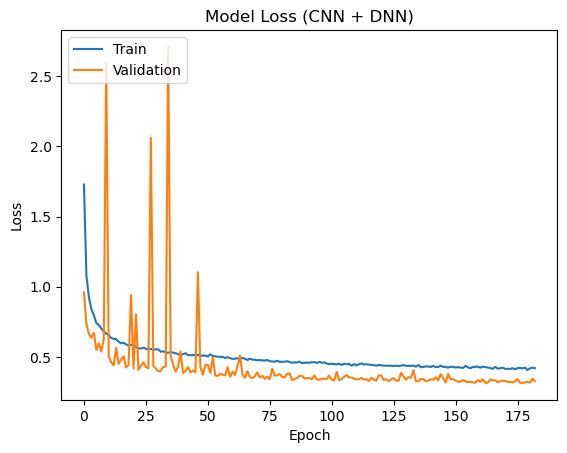

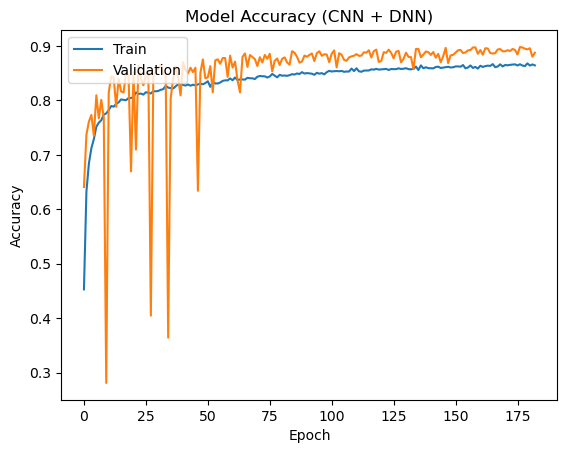

In [53]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.regularizers import l2

# 1. 데이터 로드 및 전처리
X = df.iloc[:, :-1]
y = df['fixed_type_encoded']  # 타겟 클래스

# 결측값(9)을 NaN으로 대체하고 나중에 처리
X.replace(9, np.nan, inplace=True)

# 결측치를 열 별 최빈값으로 대체
X.fillna(df.mode().iloc[0], inplace=True)

# 데이터가 모두 숫자인지 확인하고, 필요시 변환
X = X.astype(float)

# OneHot 인코딩으로 타겟을 인코딩 (다중 클래스 분류이므로 필요)
onehot = OneHotEncoder(sparse_output=False)  
y_encoded = onehot.fit_transform(y.values.reshape(-1, 1))

# 2. 훈련 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# CNN 입력 차원 조정 (1차원 배열로 변환)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 3. CNN + DNN 모델 구성
model = Sequential()

# CNN 부분 (특성 추출)
model.add(Conv1D(128, 5, activation='gelu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))  # 드롭아웃 추가

model.add(Conv1D(64, 3, activation='gelu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))  # 드롭아웃 추가

model.add(Conv1D(32, 3, activation='gelu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Flatten())

# DNN 부분 (Fully Connected Layer)
model.add(Dense(64, activation='gelu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.5))  # DNN에서도 드롭아웃 적용
model.add(Dense(32, activation='gelu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.5))

# 출력층
model.add(Dense(len(np.unique(y)), activation='softmax'))

# 4. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. 콜백 설정 및 모델 학습
early_stop = EarlyStopping(monitor='val_loss', patience=20)
model_path = 'C:/Users/user/Desktop/CNN_DNN.weights.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')

from tensorflow.keras.callbacks import LearningRateScheduler

# 학습률 스케줄러 함수 정의
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * 0.99  # 매 에포크마다 학습률을 1%씩 감소

lr_scheduler = LearningRateScheduler(scheduler)


history = model.fit(x_train, y_train, 
                    epochs=1500, 
                    batch_size=64,  # 배치 크기를 조정하여 안정적인 학습
                    validation_data=(x_test, y_test), 
                    callbacks=[early_stop, checkpoint, lr_scheduler])  # 학습률 스케줄러 추가

# 6. 학습 결과 시각화 (손실 그래프)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (CNN + DNN)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 7. 학습 결과 시각화 (정확도 그래프)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (CNN + DNN)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [54]:
model.load_weights(model_path)

In [61]:
X = np.expand_dims(X, axis=-1)

193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8960323886639676
F1 Score: 0.891370642507246
Precision: 0.8891230558487716
Recall: 0.8960323886639676
Cohen's Kappa: 0.8600103831767959


c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


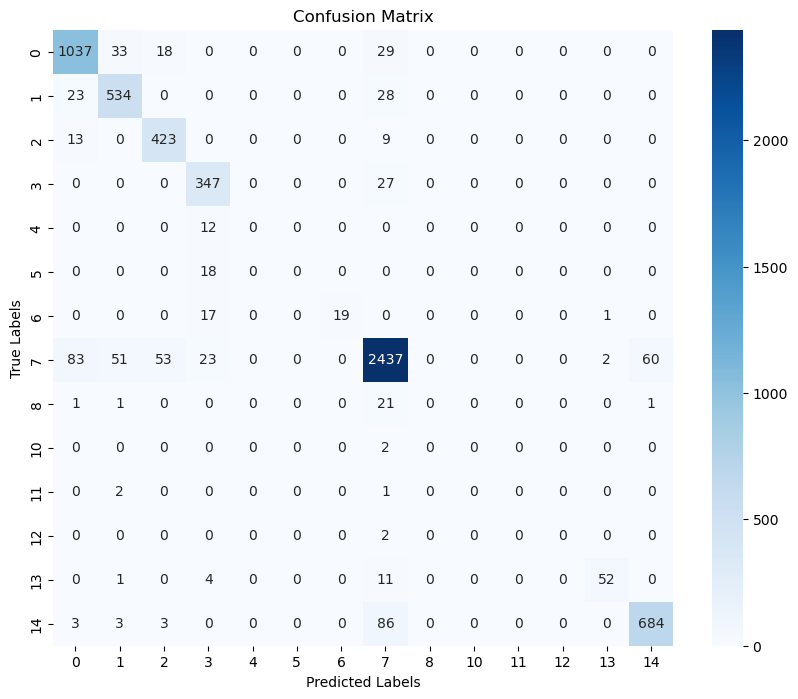

In [67]:
# 1. 예측값 계산 (학습)
predictions = model.predict(x_test)  # 각 클래스에 대한 확률 예측
actual = np.asarray(y_test)

# 예측값과 실제값 변환 (argmax로 가장 높은 확률의 클래스로 변환)
pred = [np.argmax(pred) for pred in predictions]  # 예측값
# act = y_test.tolist()  # 실제값
act = [np.argmax(a) for a in actual]  # 실제값

# DataFrame으로 변환
pred_df = pd.DataFrame(pred, columns=["예측값"])
actual_df = pd.DataFrame(act, columns=["실제값"])

# 2. 성능 지표 계산
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# 정확도
accuracy = accuracy_score(actual_df["실제값"], pred_df["예측값"])

# F1 스코어 (다중 클래스이므로 weighted 평균 사용)
f1 = f1_score(actual_df["실제값"], pred_df["예측값"], average='weighted')

# 정밀도 (Precision)
precision = precision_score(actual_df["실제값"], pred_df["예측값"], average='weighted')

# 재현율 (Recall)
recall = recall_score(actual_df["실제값"], pred_df["예측값"], average='weighted')

# 성능 결과 출력
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(actual_df["실제값"], pred_df["예측값"])
print(f"Cohen's Kappa: {kappa}")

# 3. 혼동 행렬 계산 및 시각화
conf_matrix = confusion_matrix(actual_df["실제값"], pred_df["예측값"])

# 혼동 행렬 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(act), yticklabels=np.unique(act))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 4. 결과 저장
result_df = pd.concat([pred_df, actual_df], axis=1)
result_df.to_excel("C:\\Users\\user\\Desktop\\CNN_DNN_Pred.xlsx", index=False)


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'D1': 4, 'D2': 5, 'E': 6, 'M': 7, 'M1': 8, 'M2': 9, 'Ma': 10, 'Mb': 11, 'Mc': 12, 'R': 13, 'X': 14}

In [66]:
y.value_counts()

fixed_type_encoded
7     13634
0      5748
14     3869
1      2810
2      2190
3      1823
13      321
6       202
8        97
5        80
4        52
10       20
12       12
11        8
9         5
Name: count, dtype: int64

In [64]:
y_percent = y.value_counts(normalize=True) * 100
y_percent


fixed_type_encoded
7     44.164426
0     18.619416
14    12.532798
1      9.102394
2      7.094036
3      5.905218
13     1.039811
6      0.654336
8      0.314211
5      0.259143
4      0.168443
10     0.064786
12     0.038871
11     0.025914
9      0.016196
Name: proportion, dtype: float64